LSTM-Intro
importing library
loading dataset
EDA
Building Model
Prediction
Evaluation
Conclusion

In [500]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [501]:
# Load our dataset 
# Note it should be in same dir
maindf=pd.read_csv('BTC_USD_2025.csv')

In [502]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3829
Total number of fields present in the dataset:  8


In [503]:
maindf.shape

(3829, 8)

In [504]:
maindf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [505]:
maindf.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3824,2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,0.0,0.0
3825,2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,0.0,0.0
3826,2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,30899345977,0.0,0.0
3827,2025-03-10,80597.148438,83955.929688,77420.593750,78532.000000,54061099422,0.0,0.0
3828,2025-03-11,78582.156250,81961.257812,76808.101562,79393.367188,59638005760,0.0,0.0


In [506]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3829 non-null   object 
 1   Open          3829 non-null   float64
 2   High          3829 non-null   float64
 3   Low           3829 non-null   float64
 4   Close         3829 non-null   float64
 5   Volume        3829 non-null   int64  
 6   Dividends     3829 non-null   float64
 7   Stock Splits  3829 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 239.4+ KB


In [507]:
maindf.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3829.000000,3829.000000,3829.000000,3829.000000,3.829000e+03,3829.0,3829.0
mean,20961.711458,21428.201424,20468.445621,20981.127253,1.915182e+10,0.0,0.0
std,24191.844585,24708.089098,23639.470211,24206.412831,2.083169e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,1348.300049,1434.319946,1348.300049,1421.599976,5.804440e+08,0.0,0.0
50%,9548.178711,9732.610352,9352.719727,9552.860352,1.527188e+10,0.0,0.0
75%,33907.722656,34802.742188,32475.865234,33901.527344,3.036466e+10,0.0,0.0
max,106147.296875,109114.882812,105291.734375,106146.265625,3.509679e+11,0.0,0.0


In [508]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [509]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [510]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [511]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(3829, 8)

In [512]:
# EDA
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2025-03-11


C:\Users\hp\AppData\Local\Temp\ipykernel_8048\3601440406.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\hp\AppData\Local\Temp\ipykernel_8048\3601440406.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [513]:
# Analysis of year 2014
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2014 = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Dividends','Volume']],axis=1)

,Date,Open,High,Low,Close,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,0.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,0.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,0.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,0.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,0.0
...,...,...,...,...,...,...
100,2014-12-26,319.152008,331.424011,316.627014,327.924011,0.0
101,2014-12-27,327.583008,328.911011,312.630005,315.863007,0.0
102,2014-12-28,316.160004,320.028015,311.078003,317.239014,0.0
103,2014-12-29,317.700989,320.266998,312.307007,312.670013,0.0


In [514]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise
# Note that we only have few months in 2014 so the rest of the months are NaN

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


In [515]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Bitcoin open and close price')
fig.show()

In [516]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [517]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [518]:
# Analysis of Year 2024
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2024 = maindf.loc[(maindf['Date'] >= '2024-01-01')
                     & (maindf['Date'] < '2025-01-01')]

y_2024.drop(y_2024[['Dividends','Volume']],axis=1)

,Date,Open,High,Low,Close,Stock Splits
3393,2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,0.0
3394,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,0.0
3395,2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,0.0
3396,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,0.0
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,0.0
...,...,...,...,...,...,...
3754,2024-12-27,95704.976562,97294.843750,93310.742188,94164.859375,0.0
3755,2024-12-28,94160.187500,95525.898438,94014.289062,95163.929688,0.0
3756,2024-12-29,95174.054688,95174.875000,92881.789062,93530.226562,0.0
3757,2024-12-30,93527.195312,94903.320312,91317.132812,92643.210938,0.0


In [519]:
monthvise= y_2024.groupby(y_2024['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,42910.015373,42919.612399
February,49231.727101,49875.174300
March,67372.752394,67702.439264
April,66239.900911,65882.380599
May,65044.212198,65266.317288
June,66058.262370,65899.465755
July,62737.764869,62804.542087
August,60103.896673,59921.197581
September,60213.192448,60358.515885


In [520]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [521]:
y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2024.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2024.groupby(y_2024['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [522]:
# Analysis of Year 2022
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-02-19')]

y_2020.drop(y_2024[['Dividends','Volume']],axis=1)

,Date,Open,High,Low,Close,Stock Splits
2663,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,0.0
2664,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,0.0
2665,2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,0.0
2666,2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,0.0
2667,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,0.0
2668,2022-01-06,43565.511719,43748.718750,42645.539062,43160.929688,0.0
2669,2022-01-07,43153.570312,43153.570312,41077.445312,41557.902344,0.0
2670,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,0.0
2671,2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562,0.0
2672,2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719,0.0


In [523]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,41722.190538,41811.714627
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [524]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [525]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [526]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [527]:
# Overall Analysis from 2014-2025
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2025-03-11')]

y_overall.drop(y_overall[['Dividends','Volume']],axis=1)

,Date,Open,High,Low,Close,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,0.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,0.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,0.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,0.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,0.0
...,...,...,...,...,...,...
3824,2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,0.0
3825,2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,0.0
3826,2025-03-09,86154.304688,86471.132812,80052.484375,80601.039062,0.0
3827,2025-03-10,80597.148438,83955.929688,77420.593750,78532.000000,0.0


In [528]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,24136.603944,24162.743338
February,25348.366142,25406.720668
March,23303.527524,23369.620293
April,21612.753859,21569.501019
May,19912.383328,19853.319487
June,18358.866945,18310.729459
July,17925.908300,17971.216377
August,18972.632179,18955.636092
September,17639.465991,17635.846022


In [529]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Building LSTM Model
- Preparing Data for Training and Testing
- considering 1 year data for training data (o avoid this type of flucation in the bitcoin data)
- predict Close Price of the Bitcoin so we are just Considering Close and Date

In [530]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3829, 2)


In [531]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2025', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [532]:
#  we will Take data of just 1 Year
closedf = closedf[closedf['Date'] > '2021-03-11']
closedf


,Date,Close
2368,2021-03-12,57332.089844
2369,2021-03-13,61243.085938
2370,2021-03-14,59302.316406
2371,2021-03-15,55907.199219
2372,2021-03-16,56804.902344
...,...,...
3824,2025-03-07,86742.671875
3825,2025-03-08,86154.593750
3826,2025-03-09,80601.039062
3827,2025-03-10,78532.000000


In [533]:

close_stock = closedf.copy()
print("Total data for price prediction in the last five years (March 2021- March 2025): ",closedf.shape[0])

Total data for price prediction in the last five years (March 2021- March 2025):  1461


In [534]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price - Last five years ', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [535]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1461, 1)


In [536]:
# Slicing data into Training set and Testing set

# we keep the training set as 70% and 30% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1022, 1)
test_data:  (439, 1)


In [537]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [538]:
# we Transform the Close price based on Time-series-analysis forecasting requirement ,
# Here we will take 15 time steps
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1001, 20)
y_train:  (1001,)
X_test:  (418, 20)
y_test (418,)


In [539]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1001, 20, 1)
X_test:  (418, 20, 1)


In [540]:
# LSTM Modelling
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [541]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
32/32 [==============================] - 5s 39ms/step - loss: 0.0435 - val_loss: 0.1967
Epoch 2/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0115 - val_loss: 0.0573
Epoch 3/200
32/32 [==============================] - 1s 19ms/step - loss: 0.0065 - val_loss: 0.0307
Epoch 4/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0047 - val_loss: 0.0149
Epoch 5/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 6/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 7/200
32/32 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0203
Epoch 8/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0414
Epoch 9/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0537
Epoch 10/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 0.0581
E

# Plotting Loss vs Validation loss

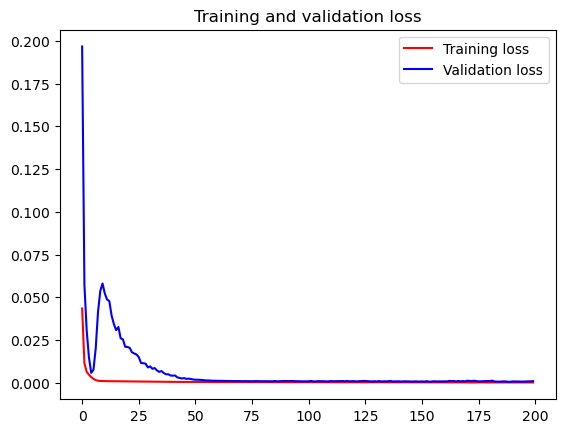

<Figure size 640x480 with 0 Axes>

In [542]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [543]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

14/14 [==============================] - 0s 2ms/step


((1001, 1), (418, 1))

In [544]:
# Model Evaluation
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [545]:
# Evaluation metrices RMSE, MSE and MAE
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1353.2991881256612
Train data MSE:  1831418.6925815735
Train data MAE:  929.6069018871754
-------------------------------------------------------------------------------------
Test data RMSE:  2816.431779546877
Test data MSE:  7932287.968841589
Test data MAE:  2120.625271007775


In [546]:
# Variance Regression Score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.988471058606042
Test data explained variance regression score: 0.9816789163795592


In [547]:
# R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9880364506904412
Test data R2 score: 0.9727320792174089


In [548]:
# Loss Mean Gamma deviance regression loss (MGD) and
# Mean Poisson deviance regression loss (MPD)

print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.001418114641288861
Test data MGD:  0.001336270218179568
----------------------------------------------------------------------
Train data MPD:  48.055665840021206
Test data MPD:  100.3628296071112


In [549]:
# Comparision of original Bitcoin close price and predicted close price
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1461, 1)
Test predicted data:  (1461, 1)


c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\_plotly_utils\basevalidators.py:107: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [550]:
# Predicting next 30 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [551]:
# Plotting last 15 days of dataset and next predicted 30 days
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50]


In [552]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [553]:
# Plotting entire Closing Stock Price with next 30 days period of prediction
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30681.853, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30678.414, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30679.893, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30679.887, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30677.090, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.804 seconds
Best ARIMA order: (0, 1, 0)
Best model AIC: 30677.090287982348
ARIMA Test MSE: 1031330936.9611
ARIMA Test MAE: 28000.0268
----- ARIMA Next 30 Days Forecast -----
2170    11366.134766
2171    11366.134766
2172    11366.134766
2173    11366.134766
2174    11366.134766
2175    11366.134766
2176    11366.134766
2177    11366.134766
2178    11366.134766
2179    11366.134766
2180    11366.134766
2181    11366.134766
2182    11366.134766
2183    11366.134766
2184    11366.134766
2185    11366.134766
2186    11366.134766
2187    11366.134766
2188 

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



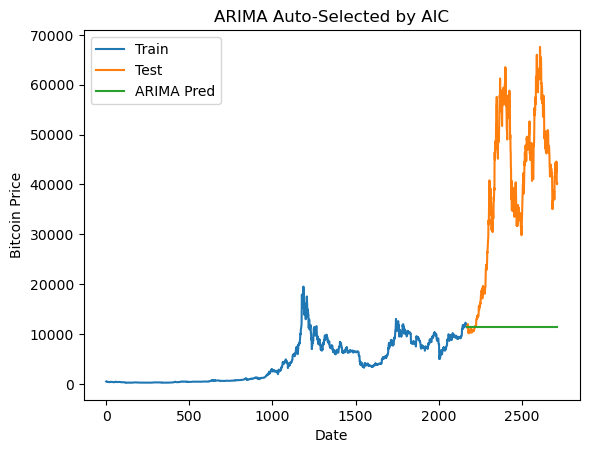

In [ ]:
############################################
# Part A: Install & Import Libraries
############################################
# If you haven’t installed pmdarima yet:
# pip install pmdarima

import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

############################################
# Part B: Split Your Data
############################################
# Assume df is a DataFrame with a Date index and a 'Close' column
df = pd.read_csv('BTC-USD.csv')
df = df.sort_index()  # ensure ascending date order
train_size = int(len(df) * 0.8)
train_data = df['Close'][:train_size]
test_data  = df['Close'][train_size:]

############################################
# Part C: Use auto_arima to Determine (p, d, q) by AIC
############################################
# The auto_arima function will search for an optimal model to minimize AIC
# (or optionally BIC, depending on your preference).

auto_arima_model = pm.auto_arima(
    train_data,
    start_p=1, start_q=1,       # initial guess for p & q
    max_p=6, max_q=6,           # upper bounds for p & q
    d=None,                     # let model determine 'd'
    test='adf',                 # use ADF test to find differencing order
    seasonal=False,             # for non-seasonal data, set seasonal=False
    trace=True,                 # prints out stepwise results to console
    error_action='ignore',      # ignore stationarity warnings
    suppress_warnings=True,     # ignore other warnings
    stepwise=True               # apply stepwise algorithm
)

# Print out the chosen p, d, q order and AIC
print("Best ARIMA order:", auto_arima_model.order)
print("Best model AIC:", auto_arima_model.aic())

# Fit ARIMA using this order
order = auto_arima_model.order
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_data, order=order).fit()

############################################
# Part D: Predict on Test Range
############################################
start_test = len(train_data)
end_test   = len(train_data) + len(test_data) - 1
arima_pred = arima_model.predict(
    start=start_test,
    end=end_test,
    typ='levels'  # to get actual price levels rather than differenced values
)

# Evaluate MSE / MAE
arima_mse = mean_squared_error(test_data, arima_pred)
arima_mae = mean_absolute_error(test_data, arima_pred)
print(f"ARIMA Test MSE: {arima_mse:}")
print(f"ARIMA Test MAE: {arima_mae:}")

############################################
# Part E: Future Forecast (Example: 30 steps)
############################################
arima_future_forecast = arima_model.forecast(steps=30)
print("----- ARIMA Next 30 Days Forecast -----")
print(arima_future_forecast)

############################################
# Part F: (Optional) Plot Results
############################################
plt.figure()
plt.title("ARIMA Auto-Selected by AIC")
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, arima_pred, label='ARIMA Pred')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()
